# Section ?


In [1]:
import pandas as pd

# Define the data from the table
data = {
    "Sender Package Number": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    "Sender Coordinates": [(-1.3, -5.3), (-10.4, -3.5), (-11.4, 14), (9.6, -15.7), (-12.2, -10), 
                           (-7.9, 2.7), (-5, -11.6), (13, -7.6), (15.4, 9.9), (-7.8, -14), 
                           (2.1, -17.1), (15.2, -15.1), (0.1, 2.2), (10, 3.7), (5.2, 8.7), 
                           (15.6, 0.5), (-4.8, 8.2), (-7.2, 0.2), (14, 5.2), (-4.8, -12)],
    "Sender Time Window": [(8, 11), (11, 13), (9, 12), (12, 14), (10, 15), 
                           (9, 11), (8, 10), (10, 14), (12, 14), (12, 15), 
                           (11, 14), (9, 12), (13, 15), (10, 12), (12, 14), 
                           (10, 13), (11, 14), (11, 13), (10, 14), (12, 14)],
    "Package Volume": [0.08, 0.13, 0.05, 0.16, 0.08, 0.06, 0.10, 0.13, 0.15, 0.17, 0.08, 0.06, 0.10, 0.16, 0.08, 0.11, 0.15, 0.06, 0.12, 0.13],
    "Recipient Package Number": [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40],
    "Recipient Coordinates": [(40, -1.4), (41, -5.5), (50, -4.7), (65, -5.8), (52, 11.6), 
                              (56.3, 5.3), (56.5, 13.7), (50.4, 18.9), (48.2, -21), (35.8, -18.2), 
                              (42.4, -16.1), (49.7, -14.2), (38.5, 5.3), (65, -16.1), (58, 2.1), 
                              (42.1, -12.9), (66.5, 7.9), (43.2, 16.6), (41.6, 11.6), (35.7, 9)],
    "Recipient Time Window": [(0, 16), (0, 17), (0, 16), (0, 18), (0, 18), 
                              (0, 17), (0, 14), (0, 17), (0, 16), (0, 18), 
                              (0, 18), (0, 18), (0, 18), (0, 15), (0, 18), 
                              (0, 17), (0, 18), (0, 17), (0, 18), (0, 17)]
}

# Create a DataFrame
df = pd.DataFrame(data)
df.head(10)


,Sender Package Number,Sender Coordinates,Sender Time Window,Package Volume,Recipient Package Number,Recipient Coordinates,Recipient Time Window
0,1,"(-1.3, -5.3)","(8, 11)",0.08,21,"(40, -1.4)","(0, 16)"
1,2,"(-10.4, -3.5)","(11, 13)",0.13,22,"(41, -5.5)","(0, 17)"
2,3,"(-11.4, 14)","(9, 12)",0.05,23,"(50, -4.7)","(0, 16)"
3,4,"(9.6, -15.7)","(12, 14)",0.16,24,"(65, -5.8)","(0, 18)"
4,5,"(-12.2, -10)","(10, 15)",0.08,25,"(52, 11.6)","(0, 18)"
5,6,"(-7.9, 2.7)","(9, 11)",0.06,26,"(56.3, 5.3)","(0, 17)"
6,7,"(-5, -11.6)","(8, 10)",0.10,27,"(56.5, 13.7)","(0, 14)"
7,8,"(13, -7.6)","(10, 14)",0.13,28,"(50.4, 18.9)","(0, 17)"
8,9,"(15.4, 9.9)","(12, 14)",0.15,29,"(48.2, -21)","(0, 16)"
9,10,"(-7.8, -14)","(12, 15)",0.17,30,"(35.8, -18.2)","(0, 18)"


In [2]:
# Define coordinates for collection and distribution hubs
collection_hub = (5, 0)
distribution_hub = (50, 0)

# Define number of vehicles and their capacity
num_vehicles = 6 # P,Q
vehicle_capacity = 0.5 # tm
num_locations = 20 # N, M
# Define speed (km/h)
speed = 20
transportation_time_hub = 0.5

In [3]:
import math
import numpy as np
def euclidean_distance(point1, point2):
    return math.sqrt((point2[0] - point1[0]) ** 2 + (point2[1] - point1[1]) ** 2)

In [4]:
sender_locations = [collection_hub] + df['Sender Coordinates'].tolist()
recipient_locations = [distribution_hub] + df['Recipient Coordinates'].tolist() 
num_locations = num_locations + 1
distance_matrix_recipient = np.zeros((num_locations, num_locations))
distance_matrix_sender = np.zeros((num_locations, num_locations))
for i in range(num_locations):
    for j in range(num_locations):
        distance_matrix_sender[i][j] = euclidean_distance(sender_locations[i], sender_locations[j])
for i in range(num_locations):
    for j in range(num_locations):
        distance_matrix_recipient[i][j] = euclidean_distance(recipient_locations[i], recipient_locations[j])

In [5]:
distance_matrix_recipient[0][20]

16.896449331146467

In [6]:
sender_transportation_time = distance_matrix_sender / 20
recipient_transportation_time = distance_matrix_recipient / 20

In [7]:
# Time windows for all locations
sender_time_windows = [(0, 18*60)] + df['Sender Time Window'].tolist()   
recipient_time_windows = [(0, 18*60)] + df['Recipient Time Window'].tolist()
# Package volumes for all locations
package_volumes = [0] + df['Package Volume'].tolist() 


In [8]:
time_vehicle_pick_up = [9.08, 9.22, 8.55, 10.53, 8.72, 9.90]

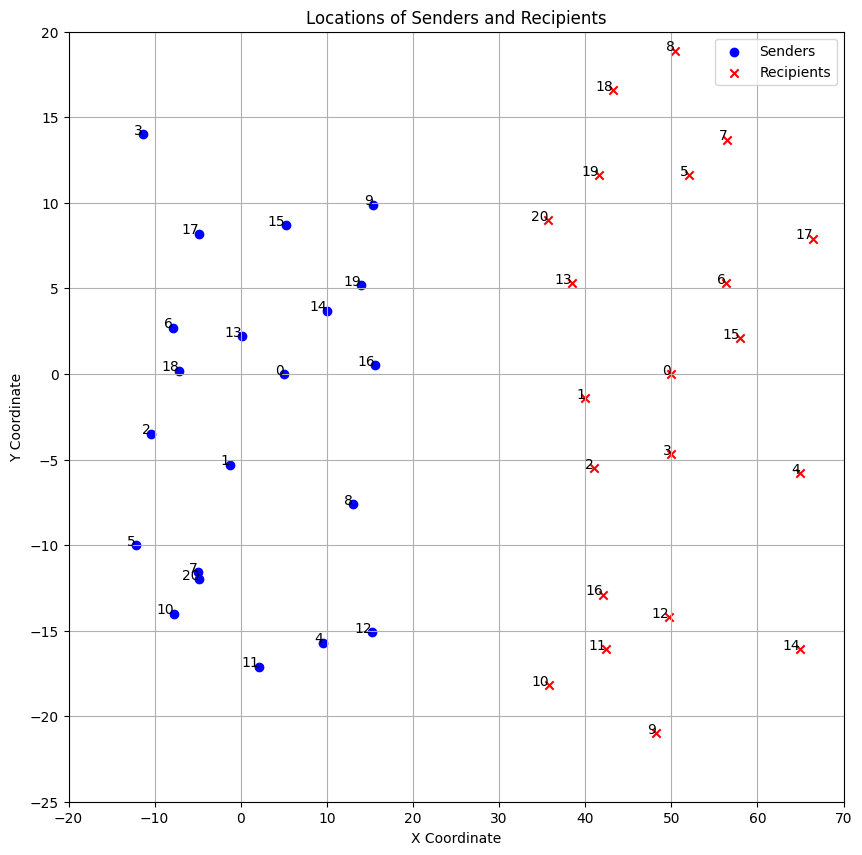

In [9]:
import matplotlib.pyplot as plt

# Coordinates of senders and recipients
senders = [
    (5, 0),
    (-1.3, -5.3), (-10.4, -3.5), (-11.4, 14), (9.6, -15.7), (-12.2, -10),
    (-7.9, 2.7), (-5, -11.6), (13, -7.6), (15.4, 9.9), (-7.8, -14),
    (2.1, -17.1), (15.2, -15.1), (0.1, 2.2), (10, 3.7), (5.2, 8.7),
    (15.6, 0.5), (-4.8, 8.2), (-7.2, 0.2), (14, 5.2), (-4.8, -12)
]
recipients = [
    (50, 0),
    (40, -1.4), (41, -5.5), (50, -4.7), (65, -5.8), (52, 11.6),
    (56.3, 5.3), (56.5, 13.7), (50.4, 18.9), (48.2, -21), (35.8, -18.2),
    (42.4, -16.1), (49.7, -14.2), (38.5, 5.3), (65, -16.1), (58, 2.1),
    (42.1, -12.9), (66.5, 7.9), (43.2, 16.6), (41.6, 11.6), (35.7, 9)
]

# Extract x and y coordinates for senders and recipients
senders_x, senders_y = zip(*senders)
recipients_x, recipients_y = zip(*recipients)

# Create the plot
plt.figure(figsize=(10, 10))
plt.scatter(senders_x, senders_y, c='blue', label='Senders', marker='o')
plt.scatter(recipients_x, recipients_y, c='red', label='Recipients', marker='x')


for i, (x, y) in enumerate(senders):
    plt.text(x, y, str(i), fontsize=10, ha='right', color='black')

# Number the recipients
for i, (x, y) in enumerate(recipients):
    plt.text(x, y, str(i), fontsize=10, ha='right', color='black')
    
# Set the limits of x and y axis
plt.xlim(-20, 70)
plt.ylim(-25, 20)

# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Locations of Senders and Recipients')

# Add legend
plt.legend()

# Show grid
plt.grid(True)

# Show the plot
plt.show()

In [28]:

import random
from deap import base, creator, tools, algorithms
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Hàm khởi tạo quần thể
def init_population(pop_size):
    population = []
    for q in range(pop_size):
        # Khởi tạo upper chromosome dựa trên quy tắc heuristic time windows
        upper_chromosome = list(range(1, num_locations))
        upper_chromosome.sort(key=lambda x: sender_time_windows[x][1]) 
        # Khởi tạo lower chromosome giống như upper chromosome
        lower_chromosome = upper_chromosome.copy()
        lower_chromosome.sort(key=lambda x: recipient_time_windows[x][1])
        def random_swap(chromosome, num_swaps):
            for _ in range(num_swaps):
                idx1, idx2 = random.sample(range(len(chromosome)), 2)
                chromosome[idx1], chromosome[idx2] = chromosome[idx2], chromosome[idx1]
            return chromosome

        num_swaps = random.randint(1, 10)  # Số lần hoán đổi ngẫu nhiên
        upper_chromosome = random_swap(upper_chromosome, num_swaps)
        lower_chromosome = random_swap(lower_chromosome, num_swaps)
        individual = [upper_chromosome, lower_chromosome]
        population.append(creator.Individual(individual))
    return population

# Đăng ký hàm khởi tạo quần thể
toolbox.register("population", init_population, pop_size=1600)
population = toolbox.population()
for i in range(5):  # In ra 5 cá thể đầu tiên
    print(population[i])

[[6, 1, 7, 3, 15, 14, 16, 12, 18, 4, 8, 5, 11, 2, 17, 19, 20, 9, 10, 13], [14, 11, 1, 13, 9, 10, 2, 16, 18, 6, 20, 12, 4, 7, 15, 17, 19, 5, 8, 3]]
[[7, 1, 14, 8, 12, 17, 16, 15, 18, 4, 3, 2, 19, 5, 11, 9, 20, 6, 10, 13], [1, 5, 12, 20, 9, 6, 14, 2, 18, 10, 3, 7, 17, 15, 11, 19, 4, 16, 8, 13]]
[[7, 1, 16, 3, 5, 14, 2, 15, 18, 4, 8, 19, 11, 6, 17, 9, 20, 12, 10, 13], [4, 14, 16, 12, 9, 6, 2, 1, 18, 3, 20, 8, 7, 11, 15, 17, 19, 5, 10, 13]]
[[17, 1, 15, 3, 12, 4, 20, 16, 8, 14, 18, 9, 10, 6, 19, 7, 2, 5, 11, 13], [7, 14, 1, 12, 9, 6, 15, 11, 18, 5, 8, 3, 4, 20, 2, 17, 16, 19, 10, 13]]
[[18, 6, 1, 10, 12, 3, 2, 14, 7, 4, 8, 9, 20, 15, 17, 11, 19, 5, 16, 13], [1, 14, 7, 3, 17, 10, 2, 5, 8, 18, 20, 6, 4, 11, 15, 9, 12, 16, 19, 13]]


/opt/conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/opt/conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [29]:
def time_arrival(individual, time_vehicle, transportation_time, num_locations):
    time_arrival_array = np.zeros(num_locations + 1)
    time_subway = np.zeros(num_locations + 1)
    for i in range(0, len(individual)):
        path_vehicle = individual[i]
        pick_up_time = time_vehicle[i]
        time_arrival_array[path_vehicle[0]] = pick_up_time
        for j in range(1, len(path_vehicle)):
            pick_up_time = pick_up_time + transportation_time[path_vehicle[j - 1]][path_vehicle[j]]
            time_arrival_array[path_vehicle[j]] = pick_up_time
        for j in range(1, len(path_vehicle) - 1):
            time_subway[path_vehicle[j]] = math.ceil(pick_up_time) + 0.5
    return time_arrival_array,time_subway



In [30]:
# def repair_individual(individual):
#     upper_individual = split_chromosome(individual[0], package_volumes, vehicle_capacity, num_vehicles)
#     lower_individual = split_chromosome(individual[1], package_volumes, vehicle_capacity, num_vehicles)
#     PU, SU = time_arrival(upper_individual,time_vehicle_pick_up, sender_transportation_time, num_locations)
#     AT, SU1 = time_arrival(lower_individual, SU, recipient_transportation_time, num_locations)

In [31]:
def check_time_arrival(individual, package_volumes, vehicle_capacity, num_vehicles, num_locations):
    upper_individual = split_chromosome(individual[0], package_volumes, vehicle_capacity, num_vehicles)
    lower_individual = split_chromosome(individual[1], package_volumes, vehicle_capacity, num_vehicles)
    PU, SU = time_arrival(upper_individual,time_vehicle_pick_up, sender_transportation_time, num_locations)
    time_vehicle_distribution = []
    for i in range(len(lower_individual)):
        min_subway = max(sub)
        for j in range(1, len(lower_individual[i]) - 1):
            min_subway = max(min_subway, sub[lower_individual[i][j]])
        time_vehicle_distribution.append(min_subway)   
    #     AT, SU1 = time_arrival(lower_individual, SU, recipient_transportation_time, num_locations)
    #     data = {
#         "Package": [f"Package {i}" for i in range(1, num_locations)],
#         "Pick Up Time": [decimal_to_time(PU[i]) for i in range(1, num_locations)],
#         "Subway Time": [decimal_to_time(SU[i]) for i in range(1, num_locations)],
#     }
#     df = pd.DataFrame(data)
#     print(lower_individual)
#     # In ra bảng kết quả
#     print(df)
    arrival_time = np.zeros(num_locations + 1)
    for i in range(0, len(lower_individual)):
        path_vehicle = lower_individual[i]
        pick_up_time = SU[i]
        for j in range(1, len(path_vehicle)):
            pick_up_time = pick_up_time + recipient_transportation_time[path_vehicle[j - 1]][path_vehicle[j]]
            if time_vehicle_distribution[i] < SU[path_vehicle[j]]:
                return False
            arrival_time[path_vehicle[j]] = pick_up_time
    return True
# print(split_chromosome(best_ind[0], package_volumes, vehicle_capacity, num_vehicles))
# check_time_arrival(best_ind, package_volumes, vehicle_capacity, num_vehicles, num_locations)


        
    



In [32]:
inf = 10000
def objective_function(individual):
    upper_individual = split_chromosome(individual[0], package_volumes, vehicle_capacity, num_vehicles)
    if upper_individual == []: return inf
    lower_individual = split_chromosome(individual[1], package_volumes, vehicle_capacity, num_vehicles)
    if lower_individual == []: return inf
    PU, sub = time_arrival(upper_individual,time_vehicle_pick_up, sender_transportation_time, num_locations)
    time_vehicle_distribution = []
    for i in range(len(lower_individual)):
        min_subway = max(sub)
        for j in range(1, len(lower_individual[i]) - 1):
            min_subway = max(min_subway, sub[lower_individual[i][j]])
        time_vehicle_distribution.append(min_subway)    
#     for i in range(num_vehicles):
#         time_vehicle_distribution.append(max(sub))
#     print(time_vehicle_distribution)
    AT, sub1 = time_arrival(lower_individual, time_vehicle_distribution, recipient_transportation_time, num_locations)
    
    result = np.zeros(num_locations + 1)
    for i in range(num_locations):
        result[i] = AT[i] - PU[i]
    return sum(result)

    # Tạo DataFrame cho kết quả
#     data = {
#         "Package": [f"Package {i}" for i in range(1, num_locations)],
#         "Pick Up Time": [decimal_to_time(PU[i]) for i in range(1, num_locations)],
#         "Subway Time": [decimal_to_time(sub[i]) for i in range(1, num_locations)],
#         "Arrival Time": [decimal_to_time(AT[i]) for i in range(1, num_locations)],
#         "Total Time": [decimal_to_time(result[i]) for i in range(1, num_locations)]
#     }
#     df = pd.DataFrame(data)
    
#     # In ra bảng kết quả
#     print(df)
    
        
    



In [33]:
def split_chromosome(chromosome, sender_volumes, vehicle_capacity, num_vehicles):
    lower_threshold = sum(sender_volumes) / num_vehicles
    volumes_value = lower_threshold 
    upper_threshold = vehicle_capacity
    require_length_path = 0
    while (require_length_path != num_vehicles):
        paths = []
        current_path = [0]
        current_path.append(chromosome[0])
        current_load = sender_volumes[chromosome[0]]
        for point in chromosome[1:num_locations - 1]:
            point_volume = sender_volumes[point]
            if current_load + point_volume <= volumes_value:
                current_path.append(point)
                current_load += point_volume
            else:
                current_path.append(0)
                paths.append(current_path)
                current_path = [0, point]
                current_load = point_volume

        current_path.append(0)
        paths.append(current_path)
        require_length_path = len(paths)  
#         print(f"Volumes_value = {volumes_value}")
#         print(paths)
        if volumes_value > upper_threshold: return []
        volumes_value = volumes_value + 0.01
    return paths 
# print(population[1])
print(split_chromosome([4, 16, 10, 12, 8, 20, 13, 11, 7, 19, 5, 6, 18, 3, 9, 14, 2, 1, 15, 17], package_volumes, vehicle_capacity, num_vehicles))
# p = population[1]
print(objective_function(population[0]))

[]
112.67601194257237


In [34]:
# Khởi tạo hàm đánh giá


def transportation_cost(individual, time_windows, time_vehicle, transportation_time):
    te = 0  # Tổng thời gian đến trước time windows
    tl = 0  # Tổng thời gian đến sau time windows
    for i in range(0, len(individual)):
        path_vehicle = individual[i]
        pick_up_time = time_vehicle[i]
        for j in range(1, len(path_vehicle) - 1):
            pick_up_time = pick_up_time + transportation_time[path_vehicle[j - 1]][path_vehicle[j]]
            if pick_up_time < time_windows[path_vehicle[j]][0]: te = te + time_windows[path_vehicle[j]][0] - pick_up_time
            if pick_up_time > time_windows[path_vehicle[j]][1]: tl = tl - time_windows[path_vehicle[j]][1] + pick_up_time
    return te, tl
    
# transportation_cost(p, sender_time_windows, time_vehicle_pick_up, sender_transportation_time)

In [35]:
import random

# Thiết lập giá trị seed cố định
def evaluate(individual, package_volumes, vehicle_capacity, num_vehicles):
    upper_individual = split_chromosome(individual[0], package_volumes, vehicle_capacity, num_vehicles)
    lower_individual = split_chromosome(individual[1], package_volumes, vehicle_capacity, num_vehicles)
    PU, sub = time_arrival(upper_individual,time_vehicle_pick_up, sender_transportation_time, num_locations)
#     print(min(sub))
    time_vehicle_distribution = []
    for i in range(len(lower_individual)):
        min_subway = max(sub)
        for j in range(1, len(lower_individual[i]) - 1):
            min_subway = max(min_subway, sub[lower_individual[i][j]])
        time_vehicle_distribution.append(min_subway)    
    te, tl = transportation_cost(upper_individual, sender_time_windows, time_vehicle_pick_up, sender_transportation_time)
    fe, fl = transportation_cost(lower_individual, recipient_time_windows, sub, recipient_transportation_time)
    obj_fn = objective_function(individual)
    penalty_cost = te * tl  + fe * fl  + obj_fn * 10
    return (penalty_cost,)  # Ensure the return value is a tuple

# print(evaluate(p, package_volumes, vehicle_capacity, num_vehicles))

In [36]:
import random
from deap import base, creator, tools

# Định nghĩa kiểu cá thể và hàm fitness
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Đăng ký các hàm khởi tạo và biến đổi vào toolbox
toolbox = base.Toolbox()

# Hàm Order Crossover (OX)
def order_crossover(p1, p2):
    size = num_locations - 1
    upper_parent_1 = p1[0]
    upper_parent_2 = p2[0]
    lower_parent_1 = p1[1]
    lower_parent_2 = p2[1]
    offspring1_1, offspring2_1 = [None]*size, [None]*size
    offspring1_2, offspring2_2 = [None]*size, [None]*size
    def order_crossover(parent1, parent2):
        size = len(parent1)
        offspring1, offspring2 = [None]*size, [None]*size

        # Chọn hai điểm ngẫu nhiên
        cut1, cut2 = sorted(random.sample(range(size), 2))

        # Copy đoạn giữa cut1 và cut2 từ bố mẹ vào con
        offspring1[cut1:cut2] = parent1[cut1:cut2]
        offspring2[cut1:cut2] = parent2[cut1:cut2]

        def fill_offspring(offspring, parent):
            current_pos = cut2
            parent_pos = cut2

            while None in offspring:
                if parent[parent_pos % size] not in offspring:
                    offspring[current_pos % size] = parent[parent_pos % size]
                    current_pos += 1
                parent_pos += 1

        fill_offspring(offspring1, parent2)
        fill_offspring(offspring2, parent1)

        return creator.Individual(offspring1), creator.Individual(offspring2)
#     offspring1_1,offspring2_1 = order_crossover(upper_parent_1, upper_parent_2)
    offspring1_2,offspring2_2 = order_crossover(lower_parent_1, lower_parent_2)
    return creator.Individual([upper_parent_1, offspring1_2]), creator.Individual([upper_parent_2, offspring2_2])
# Đăng ký hàm lai ghép vào toolbox
toolbox.register("mate", order_crossover)

# Định nghĩa các cá thể P1 và P2
parent = [
    random.sample(range(1, 21), 20),
    random.sample(range(1, 21), 20)
]
# P1 = parent[0]
# P2 = parent[1]
# print(population[0])
P1 = population[2]
P2 = population[1]
print("Parent 1:", P1)
print("Parent 2:", P2)

# Chuyển P1 và P2 thành các cá thể (individuals) của DEAP
ind1 = creator.Individual(P1)
ind2 = creator.Individual(P2)

# Thực hiện lai ghép
child1, child2 = toolbox.mate(ind1, ind2)
print("Child 1:", child1)
print("Child 2:", child2)
print(objective_function(ind1))
print(objective_function(ind2))
print(objective_function(child1))
print(objective_function(child2))

Parent 1: [[7, 1, 16, 3, 5, 14, 2, 15, 18, 4, 8, 19, 11, 6, 17, 9, 20, 12, 10, 13], [4, 14, 16, 12, 9, 6, 2, 1, 18, 3, 20, 8, 7, 11, 15, 17, 19, 5, 10, 13]]
Parent 2: [[7, 1, 14, 8, 12, 17, 16, 15, 18, 4, 3, 2, 19, 5, 11, 9, 20, 6, 10, 13], [1, 5, 12, 20, 9, 6, 14, 2, 18, 10, 3, 7, 17, 15, 11, 19, 4, 16, 8, 13]]
Child 1: [[7, 1, 16, 3, 5, 14, 2, 15, 18, 4, 8, 19, 11, 6, 17, 9, 20, 12, 10, 13], [12, 14, 10, 17, 9, 6, 2, 1, 18, 3, 20, 8, 7, 11, 15, 19, 4, 16, 13, 5]]
Child 2: [[7, 1, 14, 8, 12, 17, 16, 15, 18, 4, 3, 2, 19, 5, 11, 9, 20, 6, 10, 13], [12, 1, 20, 8, 9, 6, 14, 2, 18, 10, 3, 7, 17, 15, 11, 19, 5, 13, 4, 16]]
130.36661710788937
174.77064822159795
127.81925592600649
171.18693605849083


In [37]:
# Register the evaluation function with additional arguments
toolbox.register("evaluate", evaluate, package_volumes=package_volumes, vehicle_capacity=vehicle_capacity, num_vehicles=num_vehicles)

# Register genetic operators
toolbox.register("mate", order_crossover)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selRoulette)


NGEN = 40
CXPB = 0.8
MUTPB = 0.1

best_ind = None
best_fitness = float('inf')

# # Roulette Wheel Selection Function
# def roulette_wheel_selection(population, num_select):
#     fitness_values = [ind.fitness.values[0] for ind in population]
#     total_sum = sum(fitness_values)
#     selected = []
#     for _ in range(num_select):
#         rand_val = 0.2 * total_sum
#         cumulative_sum = 0
#         for ind in population:
#             cumulative_sum += ind.fitness.values[0]
#             if cumulative_sum >= rand_val:
#                 selected.append(ind)
#                 break
#     return selected
tournament_size = 4
def tournament_selection(pop, fitness, tournament_size, selection_size):
    def partition(pop):
        num_tournaments = int (len(pop) / tournament_size)
        index = [i for i in range(len(pop))]
        np.random.shuffle(index)
        return [index[tournament_size*i:tournament_size*i+tournament_size] for i in range(num_tournaments)]

    offspring = []

    while len(offspring) < selection_size:
        tournaments = partition(pop.copy())
        for tournament in tournaments:
            tournament_inds = [pop[idx] for idx in tournament]
            tournament_fitness = [ind.fitness.values[0] for ind in tournament_inds]
            best_ind_idx = tournament_fitness.index(min(tournament_fitness))
            offspring.append(tournament_inds[best_ind_idx])

    return offspring


for gen in range(NGEN):
    # Đánh giá fitness của quần thể hiện tại
    reserved_population = population
    remaining_population = population

    # Lai ghép phần còn lại của dân số
    offspring = []
    for i in range(0, len(remaining_population), 2):
        if i + 1 < len(remaining_population):
            ind1, ind2 = remaining_population[i], remaining_population[i + 1]
            if random.random() < CXPB:
                child1, child2 = toolbox.mate(ind1, ind2)
                del child1.fitness.values
                del child2.fitness.values
                offspring.append(child1)
                offspring.append(child2)
            else:
                offspring.append(ind1)
                offspring.append(ind2)
        else:
            offspring.append(remaining_population[i])

    # Gộp các cá thể giữ nguyên và cá thể sinh ra từ lai ghép để tạo dân số mới
#     print(f"Population trước = {len(population)}")
    population = reserved_population + offspring
    fits = map(toolbox.evaluate, population)
    for fit, ind in zip(fits, population):
        ind.fitness.values = fit
    fitness_values = [ind.fitness.values[0] for ind in population]
#     print(f"Population trước khi chọn lọc = {len(population)}")
    population = tournament_selection(population, fitness_values, tournament_size, len(population) // 2)
#     print(f"Population sau khi chọn lọc = {len(population)}")
    # Đột biến trên quần thể mới
    for mutant in population:
        if random.random() < MUTPB:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    # Đánh giá lại fitness cho dân số mới
    fits = map(toolbox.evaluate, population)
    for fit, ind in zip(fits, population):
        ind.fitness.values = fit
    fitness_values = [ind.fitness.values[0] for ind in population]
    total_sum = sum(fitness_values)
    # Tìm cá thể tốt nhất trong thế hệ hiện tại
    current_best_ind = tools.selBest(population, 1)[0]
    if current_best_ind.fitness.values[0] < best_fitness:
        best_fitness = current_best_ind.fitness.values[0]
        best_ind = current_best_ind

    # In ra fitness tốt nhất của thế hệ hiện tại
    print(f"Thế hệ {gen}: {current_best_ind.fitness.values[0]}")
    print(f"Số individual của thế hệ {gen}:", len(population))
    print(f"Best individual của thế hệ {gen}:", best_ind)
    print("Total Sum:", total_sum)

# In ra cá thể tốt nhất sau khi hoàn thành tất cả các thế hệ
print("Cá thể tốt nhất:", best_ind)
print("Giá trị fitness tốt nhất:", best_fitness)

Thế hệ 0: 944.0085110889213
Số individual của thế hệ 0: 1600
Best individual của thế hệ 0: [[4, 1, 6, 3, 12, 14, 2, 19, 18, 5, 8, 9, 13, 15, 17, 16, 20, 7, 10, 11], [9, 2, 18, 5, 14, 4, 6, 16, 3, 8, 20, 12, 13, 1, 15, 17, 19, 11, 10, 7]]
Total Sum: 2027825.5157807358
Thế hệ 1: 924.1748086997551
Số individual của thế hệ 1: 1600
Best individual của thế hệ 1: [[7, 1, 6, 4, 12, 20, 2, 16, 18, 3, 17, 9, 13, 15, 8, 19, 14, 5, 10, 11], [10, 12, 3, 6, 2, 18, 8, 20, 9, 17, 19, 11, 4, 15, 5, 7, 14, 1, 16, 13]]
Total Sum: 1868441.7306539686
Thế hệ 2: 924.1748086997551
Số individual của thế hệ 2: 1600
Best individual của thế hệ 2: [[7, 1, 6, 4, 12, 20, 2, 16, 18, 3, 17, 9, 13, 15, 8, 19, 14, 5, 10, 11], [10, 12, 3, 6, 2, 18, 8, 20, 9, 17, 19, 11, 4, 15, 5, 7, 14, 1, 16, 13]]
Total Sum: 1785476.9145704613
Thế hệ 3: 876.4885372845807
Số individual của thế hệ 3: 1600
Best individual của thế hệ 3: [[4, 1, 6, 3, 12, 14, 2, 19, 18, 5, 8, 9, 13, 15, 17, 16, 20, 7, 10, 11], [14, 9, 13, 1, 15, 2, 16, 18, 1

In [38]:
print("Best individual:", best_ind)
print("Best fitness value:", best_ind.fitness.values[0])
print(split_chromosome(best_ind[0], package_volumes, vehicle_capacity, num_vehicles))
print(split_chromosome(best_ind[1], package_volumes, vehicle_capacity, num_vehicles))

Best individual: [[4, 1, 6, 3, 12, 14, 2, 19, 18, 5, 8, 9, 13, 15, 17, 16, 20, 7, 10, 11], [2, 16, 10, 11, 9, 12, 4, 17, 5, 3, 15, 6, 14, 19, 18, 8, 7, 1, 13, 20]]
Best fitness value: 771.8408520068912
[[0, 4, 1, 6, 3, 0], [0, 12, 14, 2, 0], [0, 19, 18, 5, 8, 0], [0, 9, 13, 15, 0], [0, 17, 16, 20, 0], [0, 7, 10, 11, 0]]
[[0, 2, 16, 10, 0], [0, 11, 9, 12, 0], [0, 4, 17, 5, 0], [0, 3, 15, 6, 14, 0], [0, 19, 18, 8, 7, 0], [0, 1, 13, 20, 0]]


In [39]:
print(split_chromosome(best_ind[0], package_volumes, vehicle_capacity, num_vehicles))
print(split_chromosome(best_ind[1], package_volumes, vehicle_capacity, num_vehicles))
print(f"Fitness value: {evaluate(best_ind, package_volumes, vehicle_capacity, num_vehicles)[0]}")
print(f"Objective function value: {objective_function(best_ind)}")

[[0, 4, 1, 6, 3, 0], [0, 12, 14, 2, 0], [0, 19, 18, 5, 8, 0], [0, 9, 13, 15, 0], [0, 17, 16, 20, 0], [0, 7, 10, 11, 0]]
[[0, 2, 16, 10, 0], [0, 11, 9, 12, 0], [0, 4, 17, 5, 0], [0, 3, 15, 6, 14, 0], [0, 19, 18, 8, 7, 0], [0, 1, 13, 20, 0]]
Fitness value: 771.8408520068912
Objective function value: 76.45989145243479


In [40]:
test = [[7,19,1,18,6,11,16,12,2,20,10,8,9,15,14,17,5,3,4,13],
                [1,9,10,20,16,2,11,14,17,12,7,18,19,8,13,4,5,6,15,3]]
print(split_chromosome(test[0], package_volumes, vehicle_capacity, num_vehicles))
print(split_chromosome(test[1], package_volumes, vehicle_capacity, num_vehicles))
print(f"Fitness value: {evaluate(test, package_volumes, vehicle_capacity, num_vehicles)[0]}")
print(f"Objective function value: {objective_function(test)}")

[[0, 7, 19, 1, 18, 6, 0], [0, 11, 16, 12, 2, 0], [0, 20, 10, 0], [0, 8, 9, 15, 0], [0, 14, 17, 5, 0], [0, 3, 4, 13, 0]]
[[0, 1, 9, 10, 0], [0, 20, 16, 2, 0], [0, 11, 14, 17, 0], [0, 12, 7, 18, 19, 0], [0, 8, 13, 4, 0], [0, 5, 6, 15, 3, 0]]
Fitness value: 1244.2562776847717
Objective function value: 121.9421878389964


In [41]:
def decimal_to_time(decimal_hours):
    hours = int(decimal_hours)
    minutes = int((decimal_hours - hours) * 60)
    return f"{hours:02d}:{minutes:02d}"

In [42]:
def print_time_arrival(individual, package_volumes, vehicle_capacity, num_vehicles, num_locations):
    upper_individual = split_chromosome(individual[0], package_volumes, vehicle_capacity, num_vehicles)
    lower_individual = split_chromosome(individual[1], package_volumes, vehicle_capacity, num_vehicles)
    PU, sub = time_arrival(upper_individual,time_vehicle_pick_up, sender_transportation_time, num_locations)
    print(min(sub))
    time_vehicle_distribution = []
    for i in range(len(lower_individual)):
        min_subway = max(sub)
        for j in range(1, len(lower_individual[i]) - 1):
            min_subway = max(min_subway, sub[lower_individual[i][j]])
        time_vehicle_distribution.append(min_subway)    
#     for i in range(num_vehicles):
#         time_vehicle_distribution.append(max(sub))
#     print(time_vehicle_distribution)
    AT, sub1 = time_arrival(lower_individual, time_vehicle_distribution, recipient_transportation_time, num_locations)
    
    result = np.zeros(num_locations + 1)
    for i in range(num_locations):
        result[i] = AT[i] - PU[i]

    # Tạo DataFrame cho kết quả
    data = {
        "Package": [f"Package {i}" for i in range(1, num_locations)],
        "Pick Up Time": [decimal_to_time(PU[i]) for i in range(1, num_locations)],
        "Subway Time": [decimal_to_time(sub[i]) for i in range(1, num_locations)],
        "Arrival Time": [decimal_to_time(AT[i]) for i in range(1, num_locations)],
        "Total Time": [decimal_to_time(result[i]) for i in range(1, num_locations)]
    }
    df = pd.DataFrame(data)
    
    # In ra bảng kết quả
    print(df)
    print(f"Total Time Sum: {sum(result)}")
        
    



In [43]:
print(recipient_transportation_time[0][1])

0.5048762224545735


### Kết quả tốt nhất tìm thấy

In [44]:
print(best_ind)
print(split_chromosome(best_ind[0], package_volumes, vehicle_capacity, num_vehicles))
print(split_chromosome(best_ind[1], package_volumes, vehicle_capacity, num_vehicles))
print(f"Fitness value: {evaluate(best_ind, package_volumes, vehicle_capacity, num_vehicles)[0]}")
print(f"Objective function value: {objective_function(best_ind)}")
print_time_arrival(best_ind, package_volumes, vehicle_capacity, num_vehicles, num_locations)

[[4, 1, 6, 3, 12, 14, 2, 19, 18, 5, 8, 9, 13, 15, 17, 16, 20, 7, 10, 11], [2, 16, 10, 11, 9, 12, 4, 17, 5, 3, 15, 6, 14, 19, 18, 8, 7, 1, 13, 20]]
[[0, 4, 1, 6, 3, 0], [0, 12, 14, 2, 0], [0, 19, 18, 5, 8, 0], [0, 9, 13, 15, 0], [0, 17, 16, 20, 0], [0, 7, 10, 11, 0]]
[[0, 2, 16, 10, 0], [0, 11, 9, 12, 0], [0, 4, 17, 5, 0], [0, 3, 15, 6, 14, 0], [0, 19, 18, 8, 7, 0], [0, 1, 13, 20, 0]]
Fitness value: 771.8408520068912
Objective function value: 76.45989145243479
0.0
       Package Pick Up Time Subway Time Arrival Time Total Time
0    Package 1        10:39       13:30        14:00      03:21
1    Package 2        12:11       13:30        14:01      01:50
2    Package 3        11:45       13:30        13:44      01:58
3    Package 4        09:53       13:30        14:18      04:24
4    Package 5        10:43       13:30        15:44      05:00
5    Package 6        11:10       13:30        14:26      03:16
6    Package 7        10:39       13:30        15:15      04:35
7    Package 8      

## Vẽ đồ thị minh họa đường đi đã tìm được

### Đồ thị đường đi tìm được

/tmp/ipykernel_33/3962378617.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(sender_best_route))


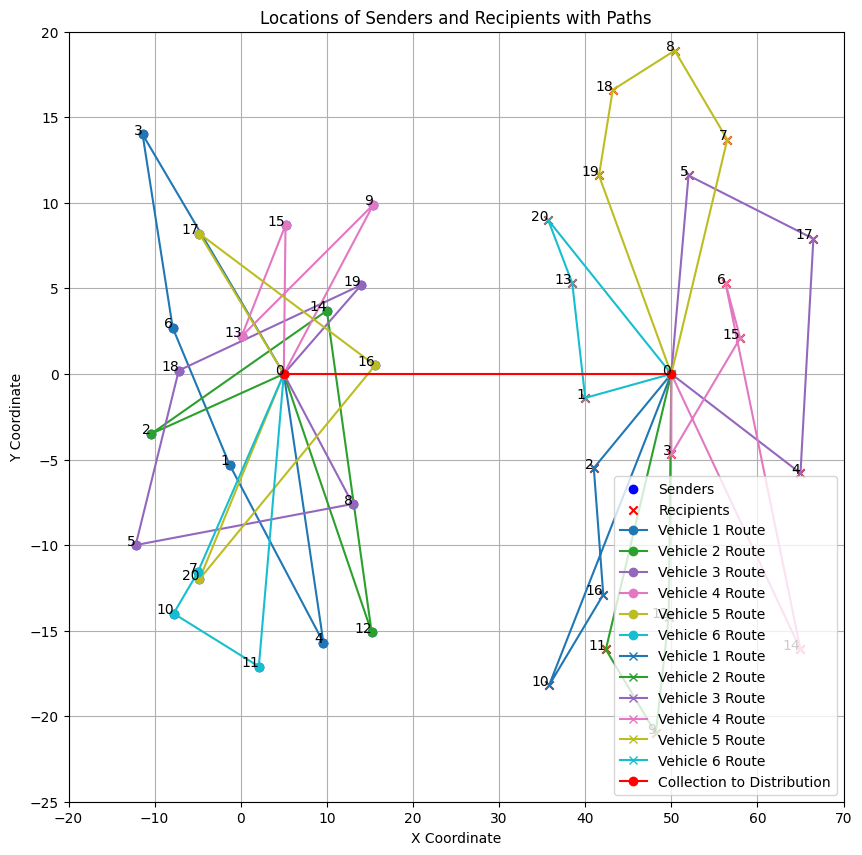

In [52]:
import matplotlib.pyplot as plt
import random

# Coordinates of senders and recipients
senders = sender_locations
recipients = recipient_locations

# Dummy best_ind for demonstration purposes
sender_best_route = split_chromosome(best_ind[0], package_volumes, vehicle_capacity, num_vehicles)
recipient_best_route = split_chromosome(best_ind[1], package_volumes, vehicle_capacity, num_vehicles)

# Extract x and y coordinates for senders and recipients
senders_x, senders_y = zip(*senders)
recipients_x, recipients_y = zip(*recipients)

# Create the plot
plt.figure(figsize=(10, 10))
plt.scatter(senders_x, senders_y, c='blue', label='Senders', marker='o')
plt.scatter(recipients_x, recipients_y, c='red', label='Recipients', marker='x')

# Number the senders
for i, (x, y) in enumerate(senders):
    plt.text(x, y, str(i), fontsize=10, ha='right', color='black')

# Number the recipients
for i, (x, y) in enumerate(recipients):
    plt.text(x, y, str(i), fontsize=10, ha='right', color='black')

# List of colors for different sender paths
colors = plt.cm.get_cmap('tab10', len(sender_best_route))

# Plot the paths for senders with different colors
for i, path in enumerate(sender_best_route):
    path_coords = [senders[idx] for idx in path]
    path_x, path_y = zip(*path_coords)
    plt.plot(path_x, path_y, linestyle='-', marker='o', color=colors(i), label=f'Vehicle {i+1} Route')

# Plot the paths for recipients in red
for i, path in enumerate(recipient_best_route):
    path_coords = [recipients[idx] for idx in path]
    path_x, path_y = zip(*path_coords)
    plt.plot(path_x, path_y, linestyle='-', marker='x', color=colors(i), label = f'Vehicle {i+1} Route')

plt.plot((5,50), (0,0), 'ro-', label='Collection to Distribution')
# Set the limits of x and y axis
plt.xlim(-20, 70)
plt.ylim(-25, 20)

# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Locations of Senders and Recipients with Paths')

# Add legend
plt.legend()

# Show grid
plt.grid(True)

# Show the plot
plt.show()

